# Explainable Recommender Systems

Exercises in this lab focus on explanations that are **integrated into the model**, both collaborative filtering and content-based recommender systems. Please refer to explainable recommender systems lecture slides by Christina Lioma, pages 159-169.

Please refer to this supplementary resources for an example of template-based approach for generating textual explanations: https://explainablerecsys.github.io/recsys2022/ 

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1: Explanations based on user-based collaborative filtering
In this exercise, we are going to explain the prediction from a neighborhood-based collaborative filtering recommender system. 

The explanation is in the form of ratings of similar users.

### 1.1
Refer back to Lab Week 6, Collaborative Filtering, Exercise 1.1-1.2, where you computed the cosine similarities (based on ratings) between the user with reviewerID `A25C2M3QF9G7OQ` and all users that have rated the item with asin `B00EYZY6LQ`.

Now, predict the rating for user `A25C2M3QF9G7OQ` on item `B00EYZY6LQ` based on the ratings from the $8$ most similar users (previously it was $3$), using a weighted (by similarity) average. What is the predicted rating (rounded to 3 decimal places)?

In [6]:
input_users['B00EYZY6LQ'].to_frame('B00EYZY6LQ')

,B00EYZY6LQ
reviewerID,
A1F7YU6O5RU432,5.0
A1R1BFJCMWX0Y3,3.0
A1UQBFCERIP7VJ,5.0
A22CW0ZHY3NJH8,3.0
A2LW5AL0KQ9P1M,4.0
A2PD27UKAD3Q00,5.0
A2WW57XX2UVLM6,4.0
A2ZY49IDE6TY5I,4.0
A39WWMBA0299ZF,5.0


In [9]:
# Load data splits from Week 6, the files are also uploaded in Absalon under Week 7
train_df = pd.read_pickle("train_dataframe.pkl") 
test_df = pd.read_pickle("test_dataframe.pkl")

# Loading and preparing data
user_item_matrix = train_df.pivot_table(index='reviewerID',columns='asin',values='overall')
user_item_matrix = user_item_matrix.fillna(0)
target_user = user_item_matrix.loc[['A25C2M3QF9G7OQ']]
input_users = user_item_matrix[user_item_matrix['B00EYZY6LQ']>0]
users = pd.concat([target_user, input_users])

# Write your code here to compute cosine similarity and report results

similarities = cosine_similarity(input_users, target_user)
item_rating_per_user = input_users['B00EYZY6LQ'].to_frame('B00EYZY6LQ')
item_rating_per_user["cosine similarity"] = similarities
item_rating_per_user

,B00EYZY6LQ,cosine similarity
reviewerID,,
A1F7YU6O5RU432,5.0,0.079243
A1R1BFJCMWX0Y3,3.0,0.245145
A1UQBFCERIP7VJ,5.0,0.058634
A22CW0ZHY3NJH8,3.0,0.207883
A2LW5AL0KQ9P1M,4.0,0.275810
A2PD27UKAD3Q00,5.0,0.000000
A2WW57XX2UVLM6,4.0,0.000000
A2ZY49IDE6TY5I,4.0,0.682835
A39WWMBA0299ZF,5.0,0.000000


In [10]:
k = 8
top_k_closest_neighbours = item_rating_per_user.sort_values(by="cosine similarity", ascending=False)[:k]
prediction_KNN = (item_rating_per_user['B00EYZY6LQ'] * item_rating_per_user['cosine similarity']).sum() / item_rating_per_user['cosine similarity'].sum()


print('Predicted rating for user A25C2M3QF9G7OQ on item B00EYZY6LQ:', round(prediction_KNN,3))

Predicted rating for user A25C2M3QF9G7OQ on item B00EYZY6LQ: 3.908


### 1.2
Visualize an explanation of the prediction for the user by plotting a bar plot of the $8$ neighbors' ratings of this beauty product.

The x-axis should be the rating (1-5) and the y-axis should be the number of neighbours with that rating of the beauty product.

reviewerID
A2ZY49IDE6TY5I    4.0
A2LW5AL0KQ9P1M    4.0
A1R1BFJCMWX0Y3    3.0
A914TQVHI872U     5.0
A22CW0ZHY3NJH8    3.0
AOEUN9718KVRD     3.0
A1F7YU6O5RU432    5.0
A1UQBFCERIP7VJ    5.0
Name: B00EYZY6LQ, dtype: float64

In [ ]:
top_k_closest_neighbours.groupby(by='B00EYZY6LQ').agg(cnt=('B00EYZY6LQ', 'size'))

AttributeError: 'function' object has no attribute 'tolist'

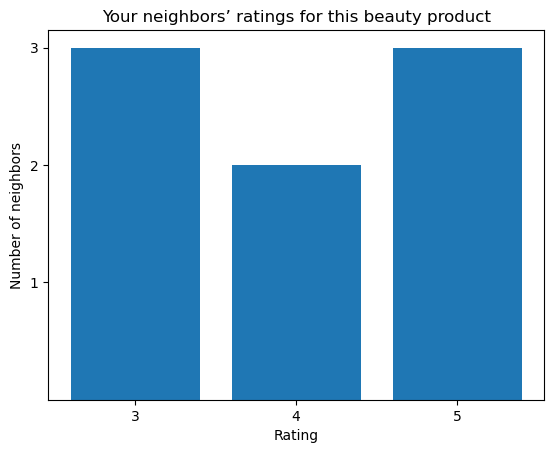

In [25]:
rating_summary_of_specific_item = top_k_closest_neighbours.groupby(by='B00EYZY6LQ').agg(cnt=('B00EYZY6LQ', 'size'))


neighbors_rating = rating_summary_of_specific_item.index.tolist()
neighbors_number = rating_summary_of_specific_item.cnt.tolist()


#<YOUR CODE HERE>



%matplotlib inline
plt.bar(neighbors_rating, neighbors_number)
plt.xticks(neighbors_rating)
plt.yticks(range(1, np.max(neighbors_number)+1))
plt.xlabel('Rating')
plt.ylabel('Number of neighbors')
plt.title('Your neighbors’ ratings for this beauty product')
plt.show()

## Exercise 2: Explanations based on content-based recommender system

In this exercise, we are going to explain the prediction from a content-based recommender system. 

The explanation is in the form of the item features that are similar to the items that have been rated by a user. 

### 2.1

Print **all** the items rated by the user with reviewerID `A39WWMBA0299ZF` (in `train_df`) and look at all the `title` given in the metadata.

_Hint_: there should be 3 items.

In [ ]:
# uncomment and run this line to see enlarge the column width of pandas dataframe
# pd.set_option('display.max_colwidth', None)

In [30]:
import os
import sys
sys.path.append('../')
import pickle
import pandas as pd

# Load the metadata (items)
item_metadata = pd.read_json("meta_All_Beauty.json", lines=True)
user_id = 'A39WWMBA0299ZF'

rated_items = train_df[train_df.reviewerID==user_id].asin.tolist()

#<YOUR CODE HERE>


In [34]:
rated_items

['B0010ZBORW', 'B001LNODUS', 'B00EYZY6LQ']

In [33]:
item_metadata[item_metadata.asin.isin(rated_items)].title.tolist()

['Urban Spa Moisturizing Booties to Keep your Feet Smooth, Hydrated and Moisturized',
 'Pre de Provence Maison French Dried Lavender Blossoms for Fragrance',
 'Fekkai Full Blown Aerosol Foam Cond Us 6.6 Oz, 6.660-Fluid Ounce']

### 2.2

Recall that in Lab Week 10, Exercise 1, we used a content-based recommender system based on TF-IDF to get the top-5 recommended items for user `A39WWMBA0299ZF`. The recommended items are in this order: 'B019FWRG3C', 'B00W259T7G', 'B00IJHY54S', 'B0006O10P4', 'B00006L9LC'

Print the item titles given in the metadata. What do these titles have in common with the titles of the items rated by the user?

Check if one of the recommended items is in the test set (`test_df`).

In [36]:
recommended_item = ['B019FWRG3C', 'B00W259T7G', 'B00IJHY54S', 'B0006O10P4', 'B00006L9LC']

In [38]:
print("These are the titles of the recommended items:")

item_metadata[item_metadata.asin.isin(recommended_item)].title.tolist()
#<YOUR CODE HERE>


These are the titles of the recommended items:


['Citre Shine Moisture Burst Shampoo - 16 fl oz',
 'Citre Shine Moisture Burst Shampoo - 16 fl oz',
 'ZUM Zum Bar Anise Lavender, 3 Ounce',
 'Spongelle Wild Flower 14+ Uses Body Wash Buffer, French Lavender, 4.25&quot; x 1.25&quot;',
 'Pre de Provence Artisanal French Soap Bar Enriched with Shea Butter, Quad-Milled For A Smooth &amp; Rich Lather (150 grams) - Raspberry',
 'Pre De Provence Maison French Lavender Bath &amp; Shower Gel']

In [39]:
print(f"Item {test_df[test_df.reviewerID=='A39WWMBA0299ZF'].asin.values[0]} is rated by the user in the test set.")

Item B019FWRG3C is rated by the user in the test set.
